In [112]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

In [113]:
DATADIR = 'data-CLEAN'
train_file = os.path.join(DATADIR, 'train_data.csv')

In [114]:
dataset = pd.read_csv(train_file)

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2336 non-null   int64  
 1   Year                                  2336 non-null   int64  
 2   Month                                 2336 non-null   int64  
 3   Day                                   2336 non-null   int64  
 4   First Hour of Period                  2336 non-null   int64  
 5   Is Daylight                           2336 non-null   bool   
 6   Distance to Solar Noon                2336 non-null   float64
 7   Average Temperature (Day)             2336 non-null   int64  
 8   Average Wind Direction (Day)          2336 non-null   int64  
 9   Average Wind Speed (Day)              2336 non-null   float64
 10  Sky Cover                             2336 non-null   int64  
 11  Visibility       

In [116]:
dataset.head(10)

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,210,2009,7,29,10,True,0.160000,65,27,13.6,1,10.0,68,14.0,29.88,10750
1,92,2009,4,2,16,True,0.298292,54,27,25.1,2,10.0,64,38.0,29.89,18575
2,353,2008,12,18,16,True,0.511344,47,20,8.7,4,10.0,69,11.0,30.14,3407
3,173,2009,6,22,10,True,0.148816,67,29,10.7,0,10.0,70,5.0,29.83,29010
4,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
5,74,2009,3,15,4,False,0.695955,55,18,8.2,4,6.0,93,5.0,30.04,0
6,320,2008,11,15,16,True,0.504119,69,14,5.0,1,10.0,27,0.0,30.05,6614
7,231,2009,8,19,4,False,0.610149,65,30,8.6,4,10.0,87,6.0,29.82,0
8,358,2008,12,23,22,False,1.136126,47,13,3.6,4,10.0,77,6.0,29.89,0
9,53,2009,2,22,10,True,0.124438,56,15,9.4,4,4.0,93,7.0,29.99,133


In [117]:
dataset.describe()

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,182.434075,2008.667808,6.496575,15.717466,11.470462,0.503012,58.397688,24.876712,10.075385,2.020120,9.526969,73.723887,10.147046,30.018609,7003.485445
std,106.290096,0.471100,3.466325,8.794526,6.885915,0.300096,6.840600,6.967913,4.796445,1.412707,1.431304,14.908556,7.262138,0.142128,10324.407377
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.250000,14.000000,0.000000,29.480000,0.000000
25%,90.000000,2008.000000,3.000000,8.000000,4.000000,0.207177,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,181.000000,2009.000000,6.000000,16.000000,10.000000,0.478077,59.000000,27.000000,10.100000,2.000000,10.000000,77.000000,9.000000,30.000000,397.000000
75%,275.000000,2009.000000,10.000000,23.000000,16.000000,0.740696,63.000000,29.000000,13.025000,3.000000,10.000000,84.000000,15.000000,30.110000,12818.500000
max,366.000000,2009.000000,12.000000,31.000000,22.000000,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,38.000000,30.530000,36368.000000


In [118]:
vals = dataset['Month'].value_counts()
for val in vals.axes:
    print(val)

Int64Index([1, 5, 3, 12, 7, 11, 8, 9, 6, 4, 10, 2], dtype='int64')


In [119]:
dataset['Sky Cover'].value_counts()

1    604
4    494
3    469
0    403
2    366
Name: Sky Cover, dtype: int64

In [120]:
dataset['Visibility'].value_counts()

10.00    1973
9.00      139
8.00       64
6.00       38
4.00       36
7.00       30
5.00       23
3.00       13
1.50        6
0.25        4
2.50        3
1.75        2
0.50        2
1.25        1
2.00        1
0.75        1
Name: Visibility, dtype: int64

In [121]:
dataset['Is Daylight'].value_counts()

True     1435
False     901
Name: Is Daylight, dtype: int64

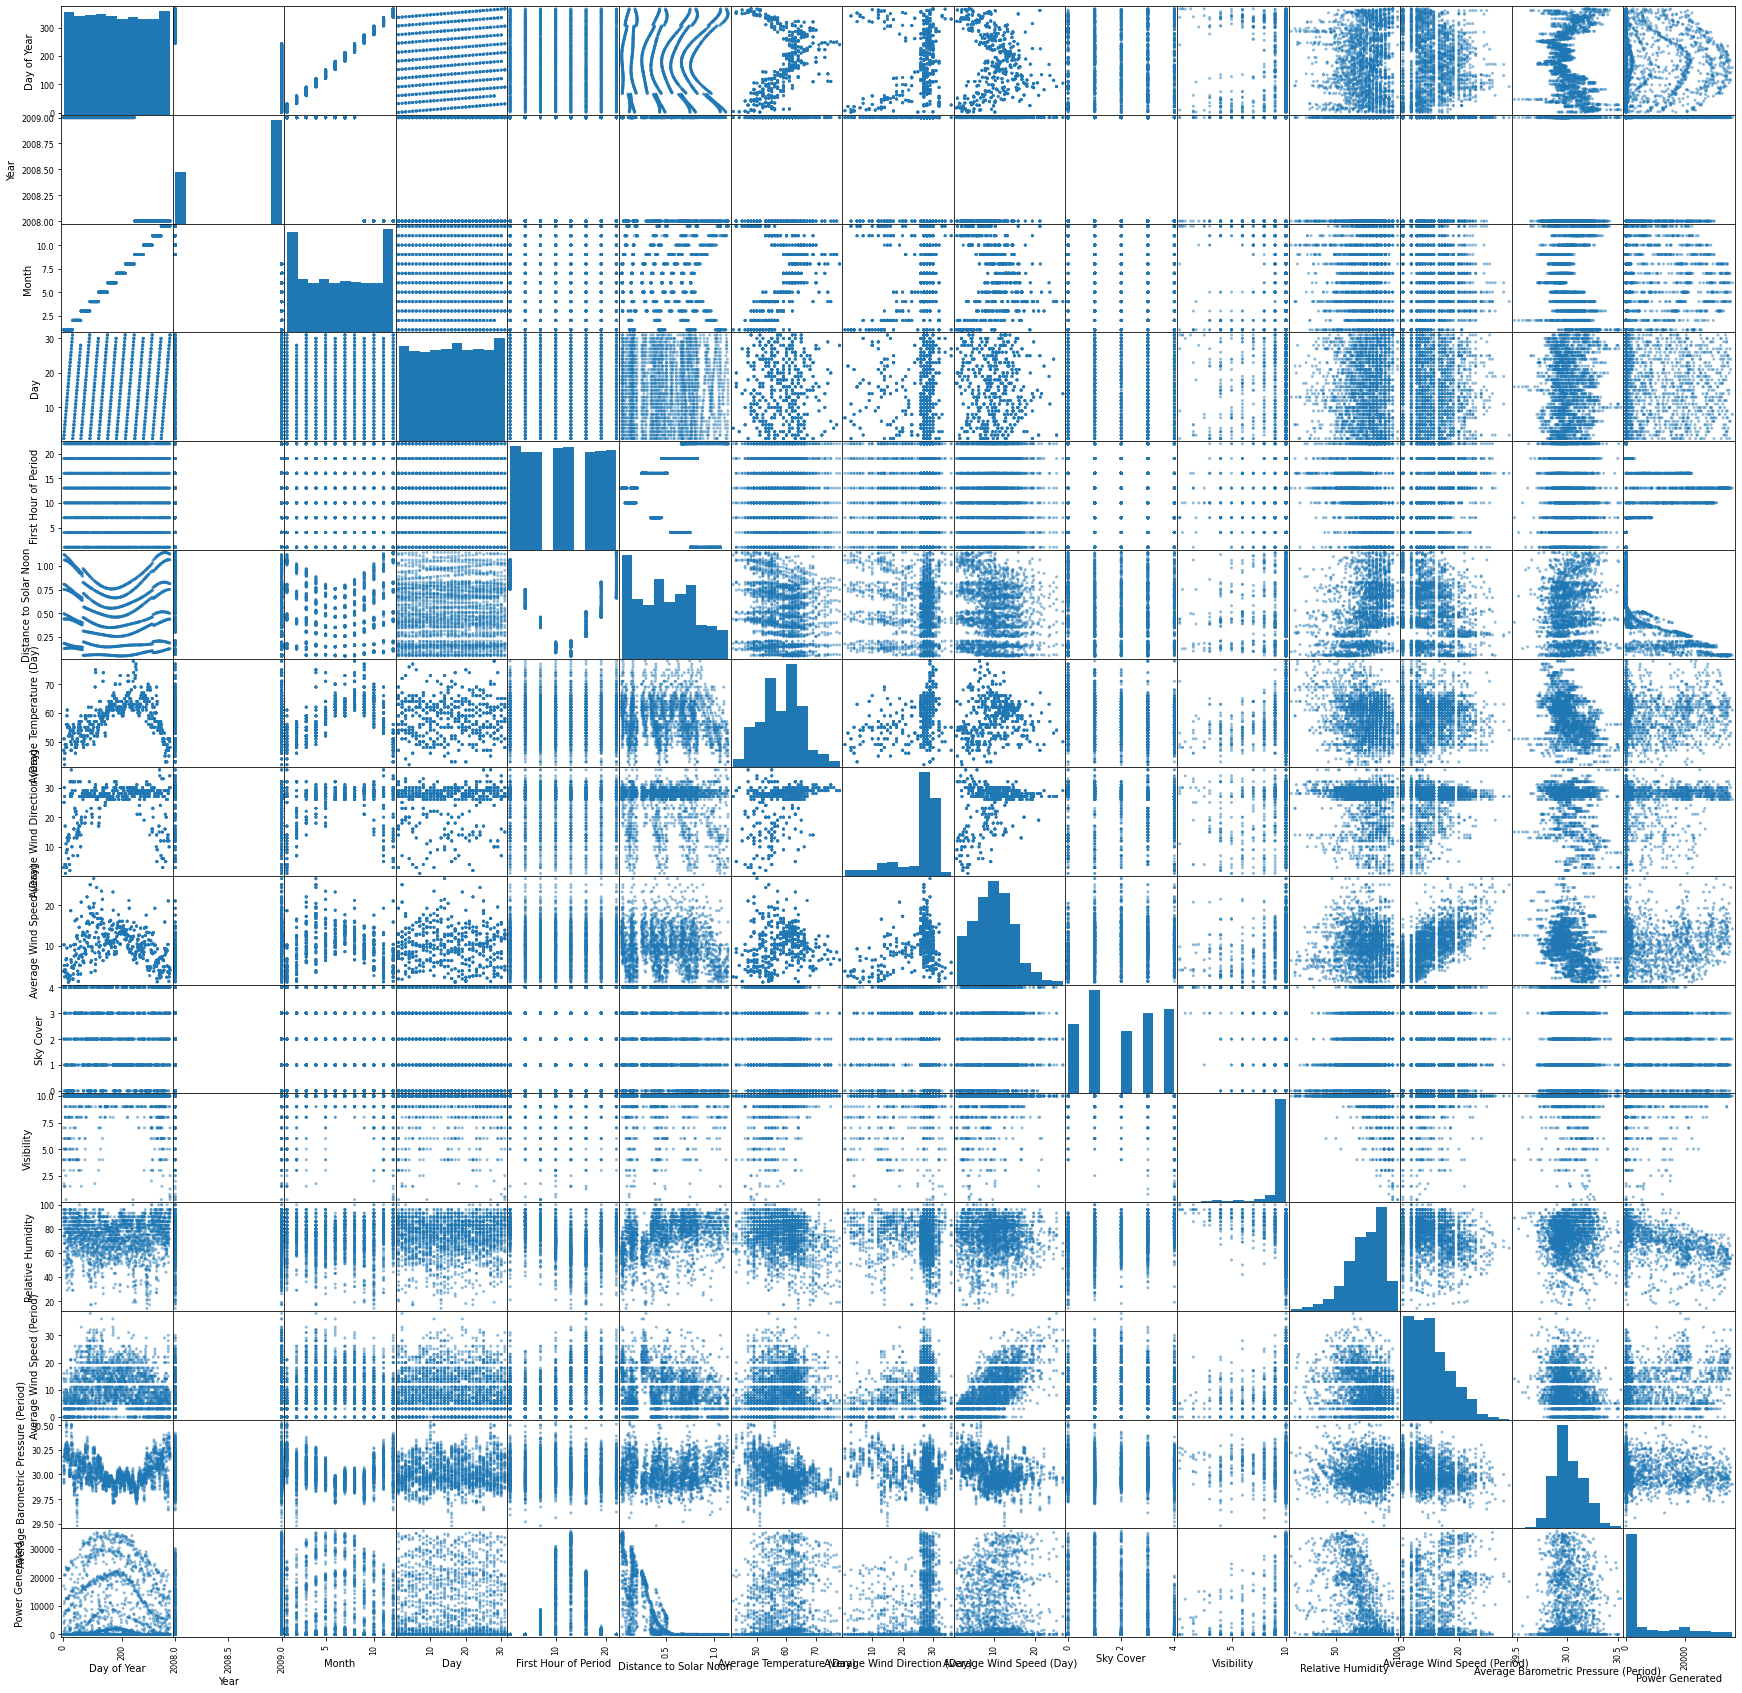

In [122]:
%matplotlib inline
scatter_mat = scatter_matrix(dataset.drop(columns='Is Daylight'), figsize=(30, 30))

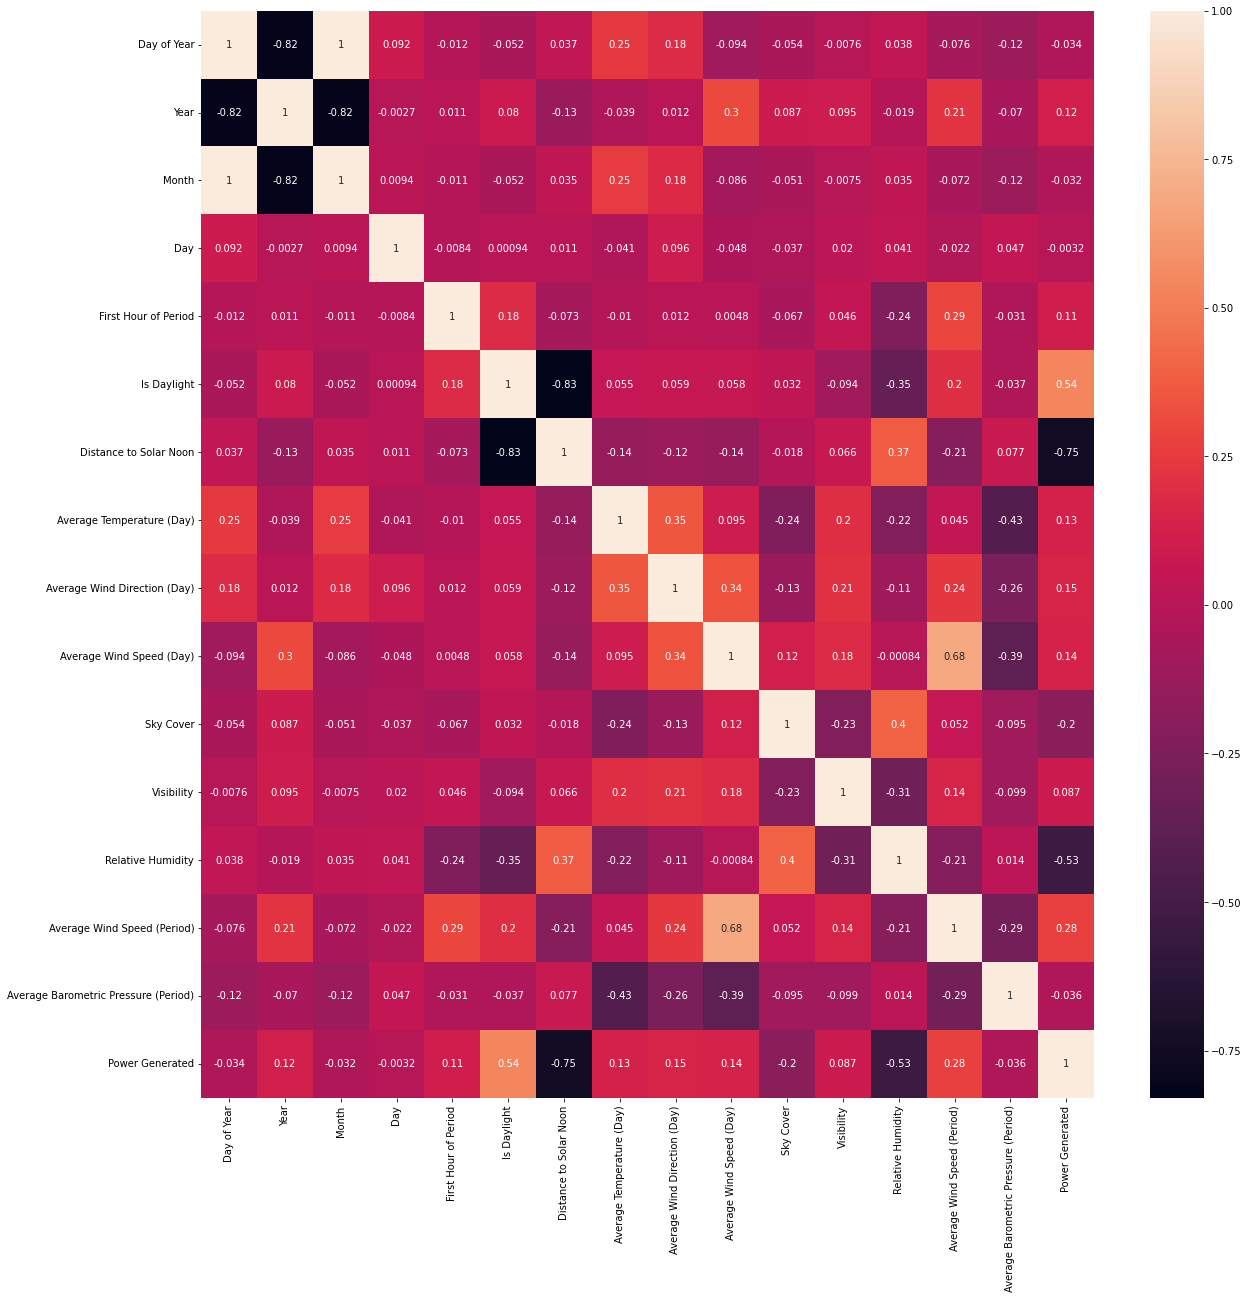

In [123]:
plt.figure(figsize=(20,20))
hmap = sns.heatmap(dataset.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

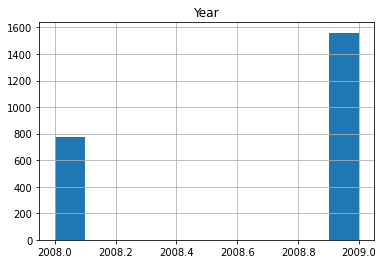

In [124]:
dataset.hist(column='Year')

In [125]:
dataset['Year'].value_counts()

2009    1560
2008     776
Name: Year, dtype: int64

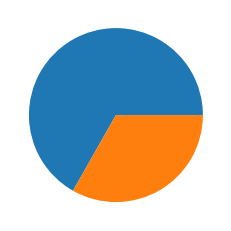

In [126]:
pie_chart = plt.pie(dataset['Year'].value_counts())

<AxesSubplot:xlabel='Year', ylabel='Power Generated'>

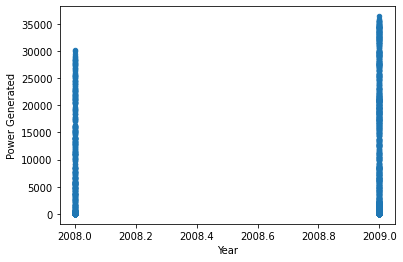

In [127]:
dataset.plot(kind='scatter', x='Year', y='Power Generated')

In [128]:
aught_eight = dataset[dataset['Year'] == 2008]
aught_eight.describe()

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,776.000000,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,306.036082,2008.0,10.525773,15.751289,11.360825,0.556574,58.775773,24.756443,8.011082,1.845361,9.335052,74.117268,7.936211,30.032680,5236.581186
std,35.708334,0.0,1.124211,8.805643,6.841333,0.324376,7.590400,7.425759,3.831749,1.456218,1.643123,16.431768,6.331396,0.149964,8220.963444
min,245.000000,2008.0,9.000000,1.000000,1.000000,0.065553,43.000000,3.000000,1.200000,0.000000,0.250000,14.000000,0.000000,29.640000,0.000000
25%,275.000000,2008.0,10.000000,8.000000,4.000000,0.207983,53.000000,23.000000,4.900000,1.000000,10.000000,67.000000,3.000000,29.920000,0.000000
50%,307.000000,2008.0,11.000000,16.000000,10.000000,0.516379,60.000000,28.000000,7.900000,2.000000,10.000000,78.000000,7.000000,30.030000,0.000000
75%,337.000000,2008.0,12.000000,23.000000,16.000000,0.821990,65.000000,29.000000,10.300000,3.000000,10.000000,86.000000,11.000000,30.140000,8373.500000
max,366.000000,2008.0,12.000000,31.000000,22.000000,1.141361,77.000000,36.000000,21.100000,4.000000,10.000000,100.000000,30.000000,30.420000,30069.000000


In [129]:
aught_nine = dataset[dataset['Year'] == 2009]
aught_nine.describe()

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,1560.000000,1560.0,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,120.950000,2009.0,4.492308,15.700641,11.525000,0.476369,58.209615,24.936538,11.102244,2.107051,9.622436,73.528205,11.246795,30.011609,7882.407051
std,70.000037,0.0,2.295086,8.791768,6.909524,0.283620,6.429489,6.730242,4.897161,1.382824,1.303364,14.091171,7.444384,0.137580,11123.253604
min,1.000000,2009.0,1.000000,1.000000,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.250000,17.000000,0.000000,29.480000,0.000000
25%,60.750000,2009.0,3.000000,8.000000,7.000000,0.191734,54.000000,26.000000,8.000000,1.000000,10.000000,65.000000,6.000000,29.920000,0.000000
50%,121.000000,2009.0,5.000000,16.000000,13.000000,0.462541,59.000000,27.000000,11.200000,2.000000,10.000000,75.000000,10.000000,29.980000,863.500000
75%,181.250000,2009.0,6.250000,23.000000,19.000000,0.706478,62.000000,29.000000,14.200000,3.000000,10.000000,84.000000,16.000000,30.100000,16276.750000
max,243.000000,2009.0,8.000000,31.000000,22.000000,1.119584,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,38.000000,30.530000,36368.000000


In [130]:
# drop 'Year' attribute
# the generated power is unevenly distributed between the two years 2008 and 2009 
# (because data was not captured for all of 2008), so the 'Year' feature will be dropped such
# that the model is not bias towards year
# 'Day' will also be dropped as it seems to have little influence on the other features (as well as power output)
dataset.drop(columns=['Year', 'Day'], inplace=True)
dataset.head(10)

,Day of Year,Month,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,210,7,10,True,0.160000,65,27,13.6,1,10.0,68,14.0,29.88,10750
1,92,4,16,True,0.298292,54,27,25.1,2,10.0,64,38.0,29.89,18575
2,353,12,16,True,0.511344,47,20,8.7,4,10.0,69,11.0,30.14,3407
3,173,6,10,True,0.148816,67,29,10.7,0,10.0,70,5.0,29.83,29010
4,243,8,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
5,74,3,4,False,0.695955,55,18,8.2,4,6.0,93,5.0,30.04,0
6,320,11,16,True,0.504119,69,14,5.0,1,10.0,27,0.0,30.05,6614
7,231,8,4,False,0.610149,65,30,8.6,4,10.0,87,6.0,29.82,0
8,358,12,22,False,1.136126,47,13,3.6,4,10.0,77,6.0,29.89,0
9,53,2,10,True,0.124438,56,15,9.4,4,4.0,93,7.0,29.99,133


In [131]:
# exploring the affect of 'Is Daylight' (Distributions, Correlations, etc.)

In [132]:
vals = dataset['Is Daylight'].value_counts()
vals

True     1435
False     901
Name: Is Daylight, dtype: int64

In [133]:
print(list(vals)[0] / sum(vals), list(vals)[1] / sum(vals))

0.6142979452054794 0.3857020547945205


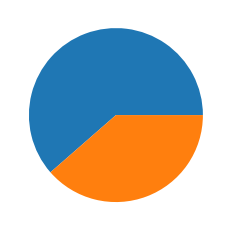

In [134]:
pie_chart = plt.pie(vals)

In [135]:
dataset['Is Daylight'] = pd.Series(map(int, dataset['Is Daylight']), name='Is Daylight')
dataset.head(10)

,Day of Year,Month,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,210,7,10,1,0.160000,65,27,13.6,1,10.0,68,14.0,29.88,10750
1,92,4,16,1,0.298292,54,27,25.1,2,10.0,64,38.0,29.89,18575
2,353,12,16,1,0.511344,47,20,8.7,4,10.0,69,11.0,30.14,3407
3,173,6,10,1,0.148816,67,29,10.7,0,10.0,70,5.0,29.83,29010
4,243,8,10,1,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
5,74,3,4,0,0.695955,55,18,8.2,4,6.0,93,5.0,30.04,0
6,320,11,16,1,0.504119,69,14,5.0,1,10.0,27,0.0,30.05,6614
7,231,8,4,0,0.610149,65,30,8.6,4,10.0,87,6.0,29.82,0
8,358,12,22,0,1.136126,47,13,3.6,4,10.0,77,6.0,29.89,0
9,53,2,10,1,0.124438,56,15,9.4,4,4.0,93,7.0,29.99,133


<AxesSubplot:xlabel='Is Daylight', ylabel='Power Generated'>

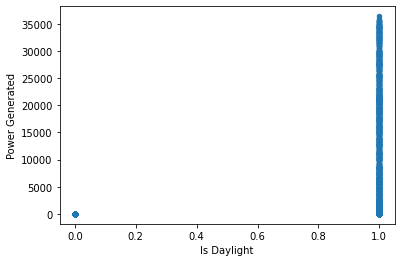

In [136]:
dataset.plot(kind='scatter', x='Is Daylight', y='Power Generated')

In [137]:
# as you would expect, absolutely no power is generated when there is no daylight
dataset[dataset['Is Daylight'] == 0]['Power Generated'].value_counts()

0    901
Name: Power Generated, dtype: int64

In [138]:
# Visualizing Individual Distributions

array([[<AxesSubplot:title={'center':'Power Generated'}>]], dtype=object)

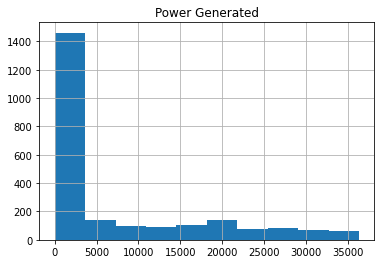

In [139]:
dataset.hist(column='Power Generated')

array([[<AxesSubplot:title={'center':'Power Generated'}>]], dtype=object)

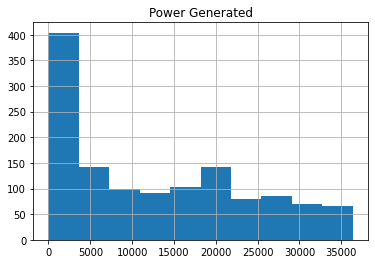

In [140]:
# removing zero values to see if distribution takes more of a 'normal' shape
dataset[dataset['Power Generated'] != 0].hist(column='Power Generated')

array([[<AxesSubplot:title={'center':'Distance to Solar Noon'}>]],
      dtype=object)

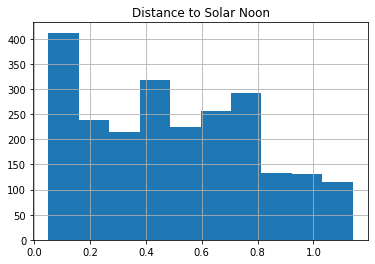

In [141]:
dataset.hist(column='Distance to Solar Noon')

array([[<AxesSubplot:title={'center':'Relative Humidity'}>]], dtype=object)

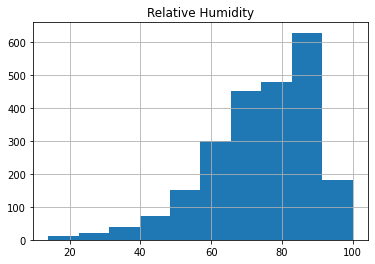

In [142]:
dataset.hist(column='Relative Humidity')

array([[<AxesSubplot:title={'center':'Month'}>]], dtype=object)

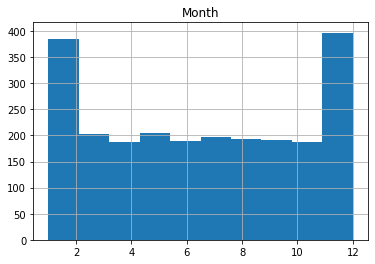

In [143]:
dataset.hist(column='Month')

array([[<AxesSubplot:title={'center':'First Hour of Period'}>]],
      dtype=object)

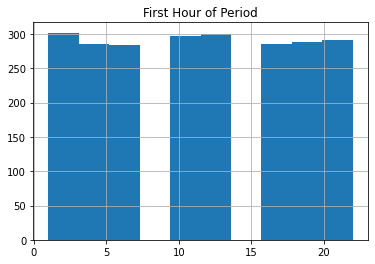

In [144]:
dataset.hist(column='First Hour of Period')

array([[<AxesSubplot:title={'center':'Average Temperature (Day)'}>]],
      dtype=object)

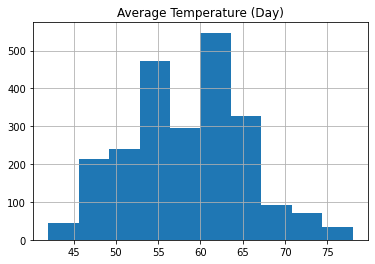

In [145]:
dataset.hist(column='Average Temperature (Day)')

array([[<AxesSubplot:title={'center':'Average Wind Direction (Day)'}>]],
      dtype=object)

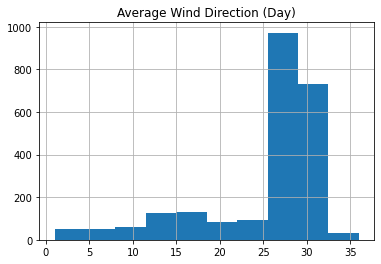

In [146]:
dataset.hist(column='Average Wind Direction (Day)')

array([[<AxesSubplot:title={'center':'Average Wind Speed (Day)'}>]],
      dtype=object)

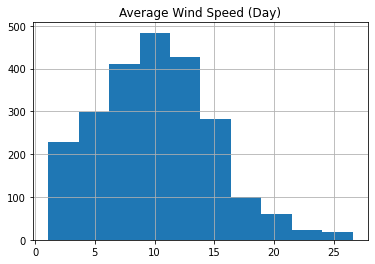

In [147]:
dataset.hist(column='Average Wind Speed (Day)')

array([[<AxesSubplot:title={'center':'Sky Cover'}>]], dtype=object)

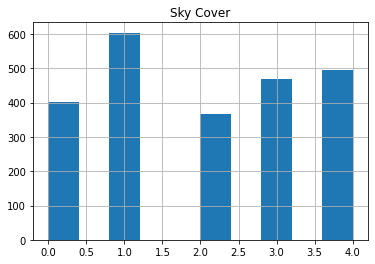

In [148]:
dataset.hist(column='Sky Cover')

array([[<AxesSubplot:title={'center':'Visibility'}>]], dtype=object)

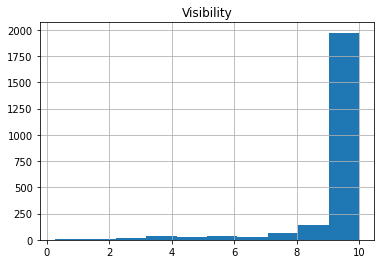

In [149]:
dataset.hist(column='Visibility')

array([[<AxesSubplot:title={'center':'Average Wind Speed (Period)'}>]],
      dtype=object)

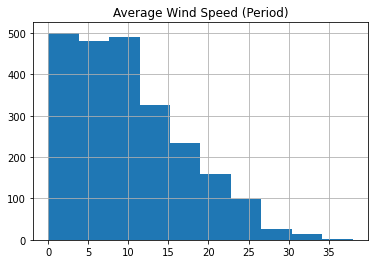

In [150]:
dataset.hist(column='Average Wind Speed (Period)')

array([[<AxesSubplot:title={'center':'Average Barometric Pressure (Period)'}>]],
      dtype=object)

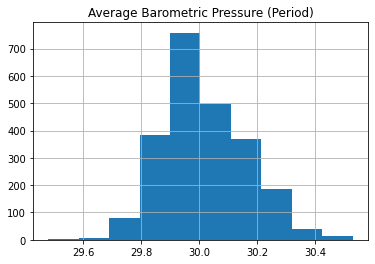

In [151]:
dataset.hist(column='Average Barometric Pressure (Period)')

In [152]:
# Visualizing Correlations (Interesting and otherwise)

<AxesSubplot:xlabel='Distance to Solar Noon', ylabel='Power Generated'>

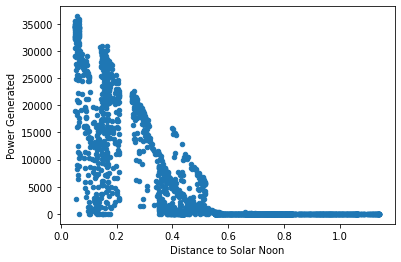

In [153]:
dataset.plot(kind='scatter', x='Distance to Solar Noon', y='Power Generated')

<AxesSubplot:xlabel='Is Daylight', ylabel='Power Generated'>

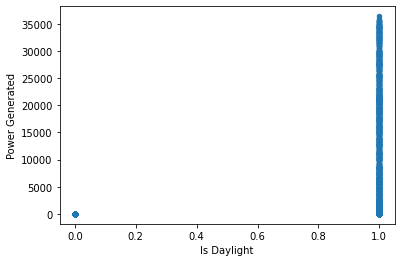

In [154]:
dataset.plot(kind='scatter', x='Is Daylight', y='Power Generated')

In [155]:
# while the 'Is Daylight' feature has a lot of correlation with the dependent variable, its values 
# (whether True or False) do not actually tell us much about the magnitude of generated power

<AxesSubplot:xlabel='Relative Humidity', ylabel='Power Generated'>

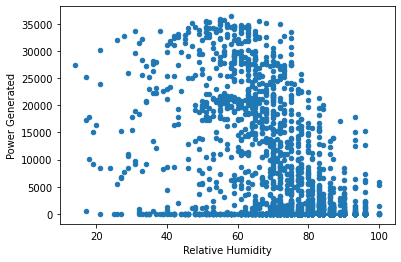

In [156]:
dataset.plot(kind='scatter', x='Relative Humidity', y='Power Generated')

<AxesSubplot:xlabel='Average Wind Speed (Period)', ylabel='Power Generated'>

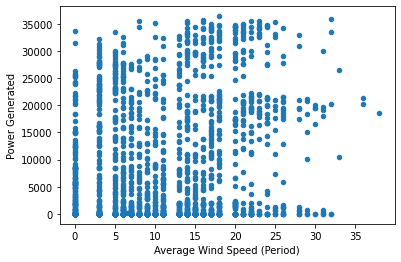

In [157]:
dataset.plot(kind='scatter', x='Average Wind Speed (Period)', y='Power Generated')

<AxesSubplot:xlabel='Day of Year', ylabel='Power Generated'>

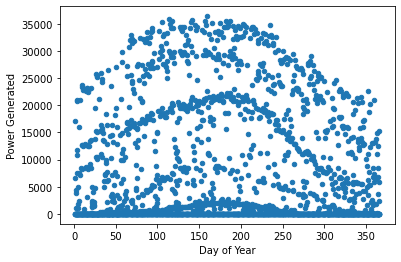

In [158]:
dataset.plot(kind='scatter', x='Day of Year', y='Power Generated')

<AxesSubplot:xlabel='Month', ylabel='Power Generated'>

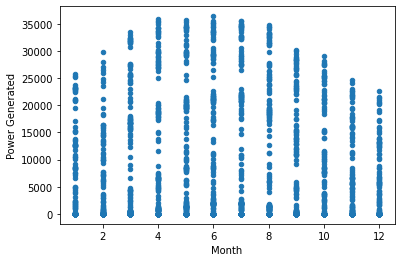

In [159]:
dataset.plot(kind='scatter', x='Month', y='Power Generated')

In [160]:
# 'Day of Year' and 'Month' have similar overall shapes when plotted against 'Power Generated'. This is to be expected.
# It may be prudent to cut one, because it seems as though they provide much of the same information.
# Ie. that within a certain range, it can be expected that the power generated by the plant will be higher on average
# than it will be outside the range.

<AxesSubplot:xlabel='First Hour of Period', ylabel='Power Generated'>

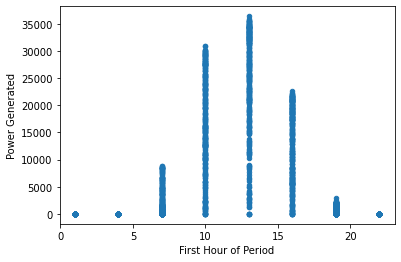

In [161]:
dataset.plot(kind='scatter', x='First Hour of Period', y='Power Generated')

<AxesSubplot:xlabel='Sky Cover', ylabel='Power Generated'>

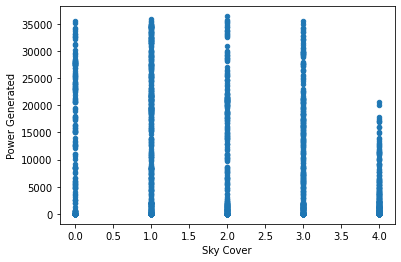

In [162]:
dataset.plot(kind='scatter', x='Sky Cover', y='Power Generated')

<AxesSubplot:xlabel='Average Temperature (Day)', ylabel='Power Generated'>

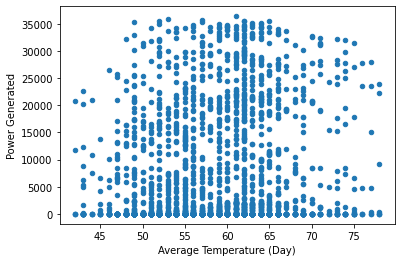

In [163]:
dataset.plot(kind='scatter', x='Average Temperature (Day)', y='Power Generated')

<AxesSubplot:xlabel='Average Barometric Pressure (Period)', ylabel='Power Generated'>

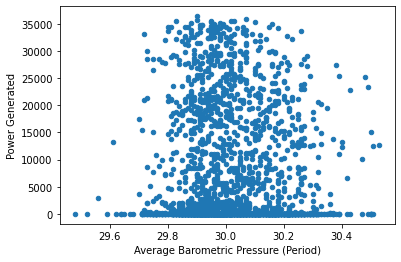

In [164]:
dataset.plot(kind='scatter', x='Average Barometric Pressure (Period)', y='Power Generated')

<AxesSubplot:xlabel='Visibility', ylabel='Power Generated'>

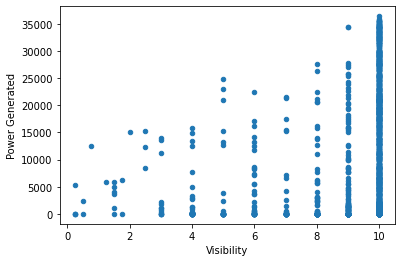

In [165]:
dataset.plot(kind='scatter', x='Visibility', y='Power Generated')

<AxesSubplot:xlabel='Day of Year', ylabel='Month'>

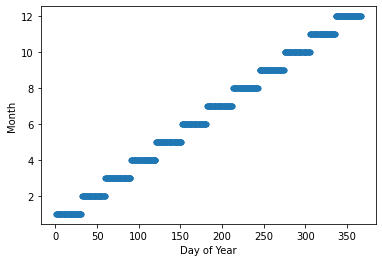

In [166]:
dataset.plot(kind='scatter', x='Day of Year', y='Month')

In [167]:
# feature engineering

In [168]:
dataset['First Hour of Period'].value_counts()

1     302
13    300
10    297
22    292
19    289
4     286
16    286
7     284
Name: First Hour of Period, dtype: int64

In [173]:
abs_dist = pd.Series(map(lambda x: abs(12-x), dataset['First Hour of Period']), name='Hours from Noon')

In [174]:
corr_mat = dataset.corr()
corr_mat['Power Generated'].sort_values(ascending=False)

Power Generated                         1.000000
Is Daylight                             0.537624
Average Wind Speed (Period)             0.276229
Average Wind Direction (Day)            0.148886
Average Wind Speed (Day)                0.140443
Average Temperature (Day)               0.133346
First Hour of Period                    0.110388
Visibility                              0.086513
Month                                  -0.032273
Day of Year                            -0.033956
Average Barometric Pressure (Period)   -0.036025
Sky Cover                              -0.195783
Relative Humidity                      -0.533692
Distance to Solar Noon                 -0.746085
Name: Power Generated, dtype: float64

In [178]:
dataset = dataset.merge(abs_dist, left_index=True, right_index=True)
dataset.head(10)

,Day of Year,Month,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated,Distance from Noon
0,210,7,10,1,0.160000,65,27,13.6,1,10.0,68,14.0,29.88,10750,2
1,92,4,16,1,0.298292,54,27,25.1,2,10.0,64,38.0,29.89,18575,4
2,353,12,16,1,0.511344,47,20,8.7,4,10.0,69,11.0,30.14,3407,4
3,173,6,10,1,0.148816,67,29,10.7,0,10.0,70,5.0,29.83,29010,2
4,243,8,10,1,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995,2
5,74,3,4,0,0.695955,55,18,8.2,4,6.0,93,5.0,30.04,0,8
6,320,11,16,1,0.504119,69,14,5.0,1,10.0,27,0.0,30.05,6614,4
7,231,8,4,0,0.610149,65,30,8.6,4,10.0,87,6.0,29.82,0,8
8,358,12,22,0,1.136126,47,13,3.6,4,10.0,77,6.0,29.89,0,10
9,53,2,10,1,0.124438,56,15,9.4,4,4.0,93,7.0,29.99,133,2


In [179]:
corr_mat = dataset.corr()
corr_mat['Power Generated'].sort_values(ascending=False)

Power Generated                         1.000000
Is Daylight                             0.537624
Average Wind Speed (Period)             0.276229
Average Wind Direction (Day)            0.148886
Average Wind Speed (Day)                0.140443
Average Temperature (Day)               0.133346
First Hour of Period                    0.110388
Visibility                              0.086513
Month                                  -0.032273
Day of Year                            -0.033956
Average Barometric Pressure (Period)   -0.036025
Sky Cover                              -0.195783
Relative Humidity                      -0.533692
Distance to Solar Noon                 -0.746085
Distance from Noon                     -0.759695
Name: Power Generated, dtype: float64

In [ ]:
dataset.drop(columns=['Month', 'First Hour of Period'], inplace=True)